# **Sepsis Prediction**

Sepsis is a life-threatening medical condition characterized by a systemic inflammatory response to infection, leading to organ dysfunction and failure.

The project aims to predict sepsis by utilizing a predictive model that takes into account various input features, including Plasma glucose level, Blood Work Result-1, Blood Pressure, Blood Work Result-2, Blood Work Result-3, Body mass index, Blood Work Result-4, Patient's age, and the presence of insurance. The goal is to develop a comprehensive prediction system for identifying sepsis risk in patients based on these key input variables.

## **1. Business Understanding**

The primary objective of this project is to develop a predictive model for sepsis detection in patients within the Intensive Care Unit (ICU). Sepsis is a life-threatening condition, and early detection is crucial for timely intervention and improved patient outcomes. The business goal is to enhance patient care by providing healthcare professionals with a tool that can assess the likelihood of sepsis development based on key clinical indicators.  

The model will utilize input features such as Plasma glucose level, Blood Work Results, Blood Pressure, Body mass index, Patient's age, and insurance status. The predictions generated by the model will assist healthcare providers in identifying patients at a higher risk of developing sepsis, enabling prompt and targeted medical interventions.

By implementing this predictive model, the healthcare system aims to achieve the following objectives:

1) Early Intervention: Enable healthcare professionals to intervene early in cases with a high predicted risk of sepsis, leading to timely and appropriate medical care.
2) Resource Optimization: Efficiently allocate medical resources by focusing attention on patients identified as high-risk, potentially reducing the overall burden on healthcare facilities.
3) Improved Patient Outcomes: Contribute to better patient outcomes by preventing or minimizing the severity of sepsis through proactive medical management.

### **1.1. Questions**

1. Is there a statistically significant difference in plasma glucose levels between sepsis and non-sepsis cases?

2. Are there specific patterns or thresholds in Blood Work Results associated with a higher likelihood of sepsis?

3. Are there identifiable trends or correlations between blood pressure levels and the likelihood of developing sepsis?

4. Is there a correlation between BMI and the risk of sepsis?

5. Is there a specific age group more susceptible to sepsis?

6. Is there any correlation between insurance status and the likelihood of developing sepsis?

7. Are certain combinations of variables more indicative of sepsis risk?

8. What are the key factors contributing to the model's performance or limitations?

### **1.2. Objectives**

1. Investigate the distribution of plasma glucose levels among patients with and without sepsis.

2. Compare the distributions of Blood Work Results for patients with and without sepsis.

3. Examine the relationship between blood pressure values and the occurrence of sepsis.

4. Analyze the distribution of Body Mass Index among individuals with and without sepsis.

5. Explore the age distribution of patients with sepsis compared to those without.

6. Determine the percentage of patients with valid insurance among those with and without sepsis.

7. Assess how well combined factors predict sepsis occurrence.

8. Evaluate the accuracy of the predictive model in identifying sepsis based on selected features.

### **1.3. Hypotheses**

1. **Plasma Glucose Levels and Sepsis:**
   - Null Hypothesis (H0): There is no significant difference in the distribution of plasma glucose levels between patients with sepsis and those without sepsis.
   - Alternative Hypothesis (H1): There is a significant difference in the distribution of plasma glucose levels between patients with sepsis and those without sepsis.

2. **Blood Work Results and Sepsis:**
   - H0: The distributions of Blood Work Results are similar for patients with and without sepsis.
   - H1: There is a significant difference in the distributions of Blood Work Results between patients with sepsis and those without sepsis.

3. **Blood Pressure Values and Sepsis:**
   - H0: There is no association between blood pressure values and the occurrence of sepsis.
   - H1: There is a significant relationship between blood pressure values and the occurrence of sepsis.

4. **Body Mass Index (BMI) and Sepsis:**
   - H0: The distribution of Body Mass Index is similar among individuals with and without sepsis.
   - H1: There is a significant difference in the distribution of Body Mass Index between individuals with sepsis and those without sepsis.

5. **Age Distribution and Sepsis:**
   - H0: The age distribution is the same for patients with sepsis and those without sepsis.
   - H1: There is a significant difference in the age distribution between patients with sepsis and those without sepsis.

6. **Insurance Status and Sepsis:**
   - H0: There is no difference in the percentage of patients with valid insurance between those with and without sepsis.
   - H1: There is a significant difference in the percentage of patients with valid insurance between those with sepsis and those without sepsis.

7. **Predictive Model and Sepsis Occurrence:**
   - H0: Combined factors do not predict the occurrence of sepsis.
   - H1: Combined factors significantly predict the occurrence of sepsis.

8. **Accuracy of Predictive Model:**
   - H0: The predictive model's accuracy in identifying sepsis based on selected features is not significantly different from random chance.
   - H1: The predictive model's accuracy in identifying sepsis based on selected features is significantly better than random chance.

## **2. Data Understanding**

### **2.1. Import Packages**

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### **2.2. Load and Describe Data**

In [2]:
# Loading Data downloaded from 
df_train = pd.read_csv('../Data/Paitients_Files_Train.csv')
df_test = pd.read_csv('../Data/Paitients_Files_Test.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [3]:
df_train['Sepssis'].unique()

array(['Positive', 'Negative'], dtype=object)

In [4]:
df_train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


- No missing values

- All variables are in numbers except Sepssis (object)

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


In [6]:
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


### **2.3. EDA**

In [7]:
df_train.describe().round(3)

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000,599.000,599.000,599.000,599.000,599.000,599.000,599.000,599.000
mean,3.825,120.154,68.733,20.563,79.461,31.920,0.481,33.290,0.686
std,3.363,32.682,19.336,16.018,116.576,8.008,0.338,11.828,0.464
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,64.000,0.000,0.000,27.100,0.248,24.000,0.000
50%,3.000,116.000,70.000,23.000,36.000,32.000,0.383,29.000,1.000
75%,6.000,140.000,80.000,32.000,123.500,36.550,0.647,40.000,1.000
max,17.000,198.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


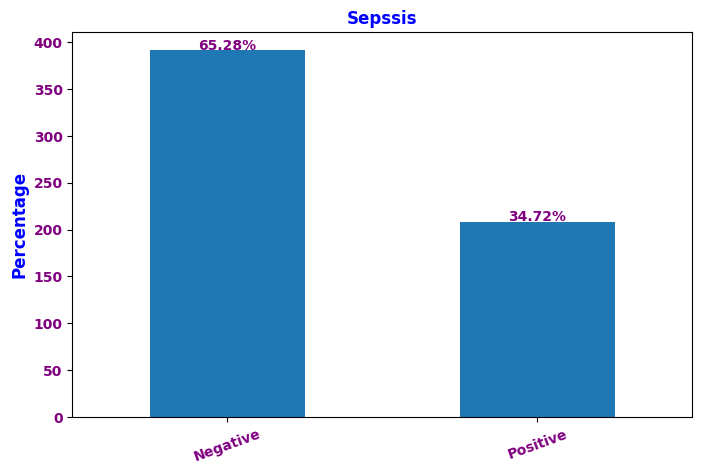

In [8]:
Sepssis_counts = df_train['Sepssis'].value_counts()
# Calculate percentages
total_count = Sepssis_counts.sum()
percentage_values = (Sepssis_counts / total_count) * 100
# Plot the bar chart
ax = Sepssis_counts.plot(kind='bar', figsize=(8,5))
# Annotate bars with percentages
for i, value in enumerate(percentage_values):
    ax.text(i, Sepssis_counts.iloc[i] + 1, f'{value:.2f}%', ha='center', color='purple', fontsize=10, fontweight='bold')
# Set title with font weight and size specified correctly
plt.title('Sepssis', color = 'blue', fontweight ='bold', fontsize =12)
plt.xticks(rotation = 20, color = 'purple', fontweight='bold')
plt.xlabel('')
plt.ylabel('Percentage', color = 'blue', fontweight = 'bold', fontsize = 12)
plt.yticks(color='purple', fontweight='bold')
plt.show()

- **in 34.72% of the patients diagnostic tests indicated the presence of sepsis**

#### **1) Distribution of plasma glucose levels among patients with and without sepsis**



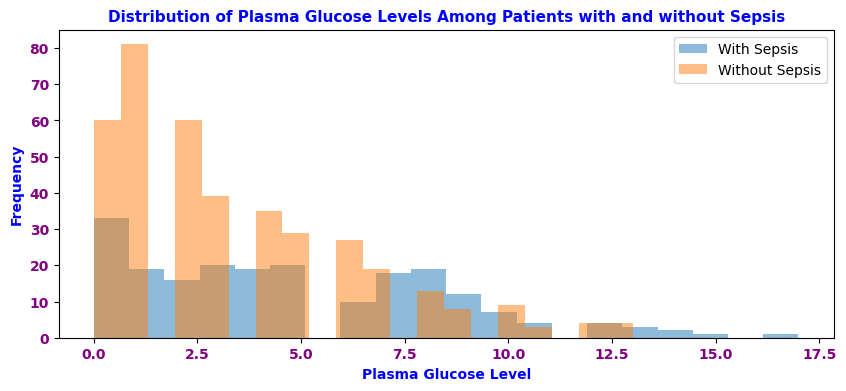

In [9]:
# Filter data for patients with sepsis and without sepsis
sepsis_patients = df_train[df_train['Sepssis'] == 'Positive']
non_sepsis_patients = df_train[df_train['Sepssis'] == 'Negative']

# Plot histograms for plasma glucose levels
plt.figure(figsize=(10, 4))  # Adjust figure size as needed
plt.hist(sepsis_patients['PRG'], bins=20, alpha=0.5, label='With Sepsis')
plt.hist(non_sepsis_patients['PRG'], bins=20, alpha=0.5, label='Without Sepsis')

# Add labels and title
plt.xlabel('Plasma Glucose Level', color = "blue", fontsize=10, fontweight = 'bold')
plt.ylabel('Frequency', color = 'blue', fontsize = 10, fontweight = 'bold')
plt.title('Distribution of Plasma Glucose Levels Among Patients with and without Sepsis', color = 'blue', fontsize = 11, fontweight='bold')
plt.xticks(color='purple', fontweight = 'bold')
plt.yticks(color='purple', fontweight = 'bold')
plt.legend()
plt.show()

- From the graph above, the higher the plasma glucos level the heigher the patient to be with Sepsis

In [10]:
# Perform independent samples t-test
statistic, p_value = ttest_ind(sepsis_patients['PRG'], non_sepsis_patients['PRG'])

# Print the results
print("Independent Samples T-test:")
print(f"Statistic: {statistic:.2f}")
print(f"P-value: {p_value:.2f}")

# Interpret the results
if p_value <= 0.01:
    print("Since p-value <=0.01, there is a significant difference in plasma glucose levels between patients with and without sepsis.")
else:
    print("There is no significant difference in plasma glucose levels between patients with and without sepsis.")

Independent Samples T-test:
Statistic: 5.17
P-value: 0.00
Since p-value <=0.01, there is a significant difference in plasma glucose levels between patients with and without sepsis.


#### **2) Distributions of Blood Work Results for patients with and without sepsis.**

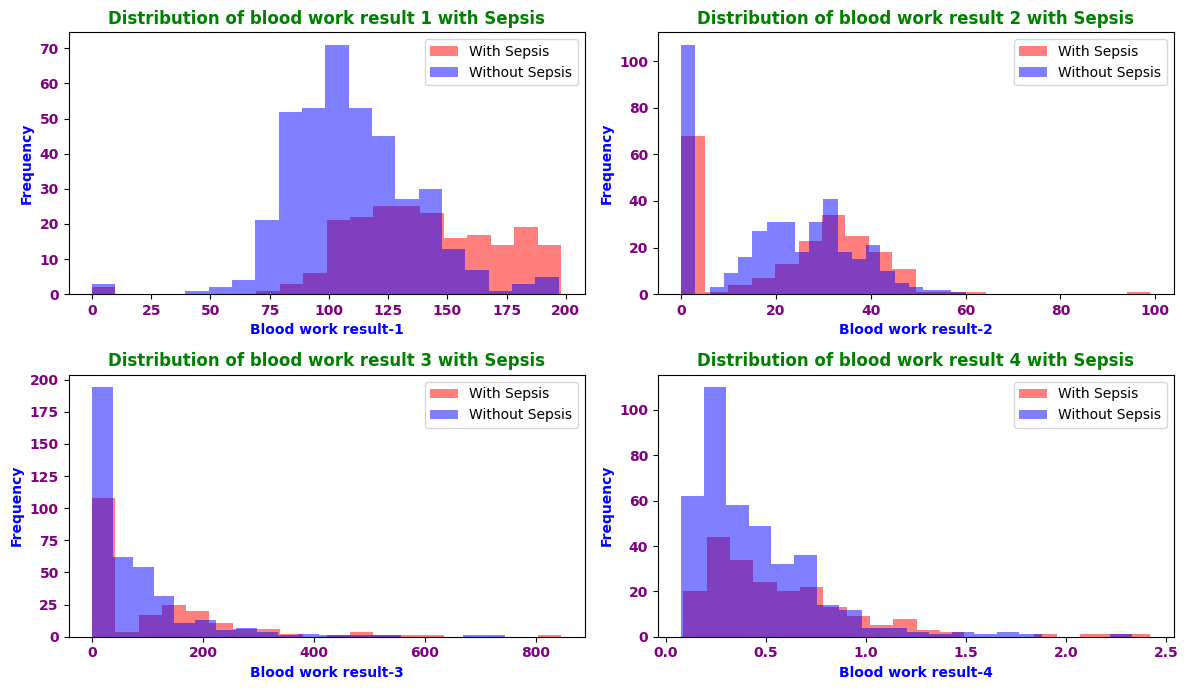

In [11]:
# Select relevant columns
blood_work_columns = ['PL', 'SK', 'TS', 'BD2', 'Sepssis']
blood_work_df = df_train[blood_work_columns]
# Separate data by sepsis status
sepsis_patients = blood_work_df[blood_work_df['Sepssis'] == 'Positive']
non_sepsis_patients = blood_work_df[blood_work_df['Sepssis'] == 'Negative']
plt.figure(figsize=(12, 7)) # Plot histograms for each blood work result
for i, col in enumerate(blood_work_columns[:-1]):
    plt.subplot(2, 2, i+1)
    plt.hist(sepsis_patients[col], bins=20, alpha=0.5, color='red', label='With Sepsis')
    plt.hist(non_sepsis_patients[col], bins=20, alpha=0.5, color='blue', label='Without Sepsis')
    plt.xticks(color = 'purple', fontweight='bold')
    plt.yticks(color = 'purple', fontweight='bold')
    plt.xlabel(f'Blood work result-{i+1}', color = 'blue', fontweight='bold')
    plt.ylabel('Frequency', color = 'blue', fontweight='bold')
    plt.title(f'Distribution of blood work result {i+1} with Sepsis', color = 'green', fontweight='bold')
    plt.legend()
plt.tight_layout()
plt.show()

In [12]:
# Perform independent samples t-test
print(f"Independent Samples T-test")
for i, col in enumerate(blood_work_columns[:-1]):
    statistic, p_value = ttest_ind(sepsis_patients[col], non_sepsis_patients[col])
    print(f"For blood work results-{i+1}; T-Statistic = {statistic:.2f} and P-value = {p_value:.2f}") # Print the results
    if p_value <= 0.01: # Interpret the results
        print(f"==> Since p-value <= 0.01, there is a significant difference in blood work results-{i+1} between patients with and without sepsis.")
    else:
        print(f"==> There is no significant difference in blood work results-{i+1} between patients with and without sepsis.")

Independent Samples T-test
For blood work results-1; T-Statistic = 12.30 and P-value = 0.00
==> Since p-value <= 0.01, there is a significant difference in blood work results-1 between patients with and without sepsis.
For blood work results-2; T-Statistic = 1.85 and P-value = 0.06
==> There is no significant difference in blood work results-2 between patients with and without sepsis.
For blood work results-3; T-Statistic = 3.60 and P-value = 0.00
==> Since p-value <= 0.01, there is a significant difference in blood work results-3 between patients with and without sepsis.
For blood work results-4; T-Statistic = 4.51 and P-value = 0.00
==> Since p-value <= 0.01, there is a significant difference in blood work results-4 between patients with and without sepsis.


#### **3) 4) 5) 6) Distribution of Blood pressure, BMI, Age and Insurance with Sepsis**

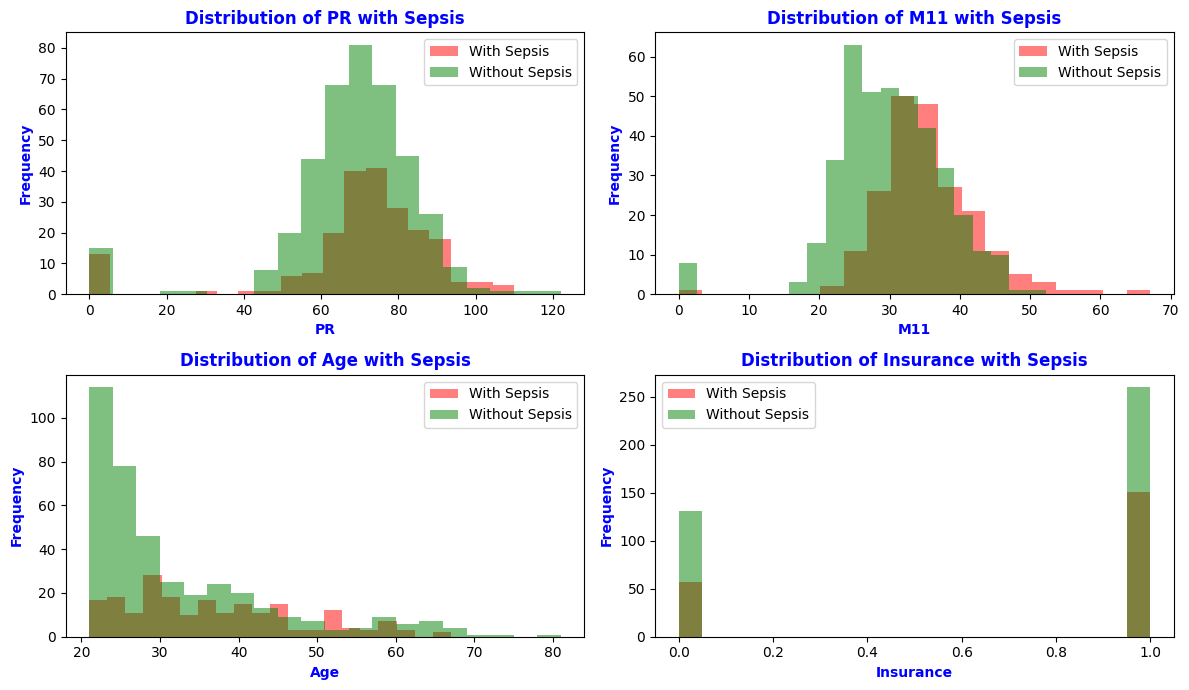

In [13]:
# Distribution of Blood Pressure, Body mass index, Age, and Insurance with Sepsis
comparison_columns = ['PR', 'M11', 'Age', 'Insurance', 'Sepssis']
comparison_df = df_train[comparison_columns]
sepsis_patients = comparison_df[comparison_df['Sepssis'] == 'Positive'] # Separate data with positive sepsis
non_sepsis_patients = comparison_df[comparison_df['Sepssis'] == 'Negative'] # Separate data with negative sepsis
plt.figure(figsize=(12, 7)) # figure size
for i, col in enumerate(comparison_columns[:-1]): # Plot histograms for numerical variables
    plt.subplot(2, 2, i+1)
    plt.hist(sepsis_patients[col], bins=20, alpha=0.5, color='red', label='With Sepsis')
    plt.hist(non_sepsis_patients[col], bins=20, alpha=0.5, color='green', label='Without Sepsis')
    plt.xlabel(col, color='blue', fontweight='bold')
    plt.ylabel('Frequency', color='blue', fontweight='bold')
    plt.title(f'Distribution of {col} with Sepsis', color='Blue', fontweight='bold')
    plt.legend()
plt.tight_layout()
plt.show()

In [14]:
# Perform independent samples t-test
print(f"Independent Samples T-test")
for col in comparison_columns[:-1]:
    statistic, p_value = ttest_ind(sepsis_patients[col], non_sepsis_patients[col])
    print(f"For {col}; T-Statistic = {statistic:.2f} and P-value = {p_value:.2f}") # Print the results
    if p_value <= 0.01: # Interpret the results
        print(f"==> Since p-value <= 0.01, there is a significant difference in {col} between patients with and without sepsis.")
    else:
        print(f"==> There is no significant difference in {col} between patients with and without sepsis.")

Independent Samples T-test
For PR; T-Statistic = 1.50 and P-value = 0.14
==> There is no significant difference in PR between patients with and without sepsis.
For M11; T-Statistic = 8.13 and P-value = 0.00
==> Since p-value <= 0.01, there is a significant difference in M11 between patients with and without sepsis.
For Age; T-Statistic = 5.25 and P-value = 0.00
==> Since p-value <= 0.01, there is a significant difference in Age between patients with and without sepsis.
For Insurance; T-Statistic = 1.53 and P-value = 0.13
==> There is no significant difference in Insurance between patients with and without sepsis.


In [15]:
# Correlation matrix
df_train = df_train.drop(columns=['ID'])
label_encoder = LabelEncoder()
# Encode the "Sepssis" column
df_train['Sepssis'] = label_encoder.fit_transform(df_train['Sepssis'])
df_train.corr().round(3)

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
PRG,1.000,0.140,0.117,-0.081,-0.055,0.033,-0.052,0.533,0.085,0.207
PL,0.140,1.000,0.143,0.054,0.340,0.216,0.145,0.274,0.051,0.450
PR,0.117,0.143,1.000,0.198,0.095,0.269,0.008,0.226,-0.025,0.061
SK,-0.081,0.054,0.198,1.000,0.429,0.378,0.177,-0.122,-0.017,0.076
TS,-0.055,0.340,0.095,0.429,1.000,0.185,0.218,-0.012,0.042,0.146
M11,0.033,0.216,0.269,0.378,0.185,1.000,0.128,0.046,0.027,0.316
BD2,-0.052,0.145,0.008,0.177,0.218,0.128,1.000,0.034,0.006,0.182
Age,0.533,0.274,0.226,-0.122,-0.012,0.046,0.034,1.000,0.054,0.210
Insurance,0.085,0.051,-0.025,-0.017,0.042,0.027,0.006,0.054,1.000,0.063
Sepssis,0.207,0.450,0.061,0.076,0.146,0.316,0.182,0.210,0.063,1.000


- **The correlations between Sepsis and other features range from 0.061 to 0.450. These values suggest moderate positive relations between "Sepssis" and the features.**

## **3. Data Preparation**

### **3.1. Missing Value Handling**

In [16]:
df_train.isnull().sum()

PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

- **Training dataset has no mising values.** No need of missing value handling.

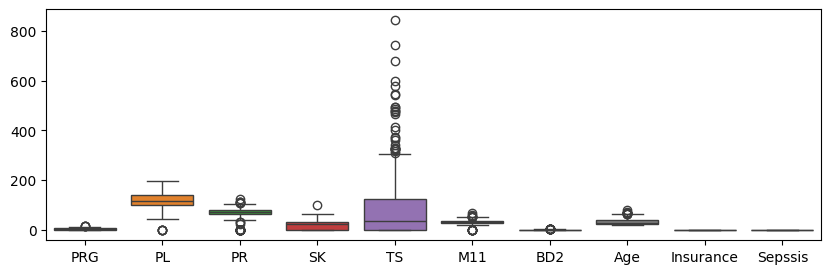

In [17]:
# Box plot for numerical columns
plt.figure(figsize=(10, 3))
sn.boxplot(data=df_train)
plt.xticks(rotation=0)
plt.show()

In [18]:
# Define a function to detect outliers using IQR
def detect_outliers_iqr(column):
    Q1, Q3 = np.percentile(column, 25), np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers
outliers_dict = {} # iterate and detect outliers
for column in df_train.columns:
    if df_train[column].dtype in ['int64', 'float64']:
        outliers_dict[column] = detect_outliers_iqr(df_train[column])
for column, outliers in outliers_dict.items(): # Print outliers for each column
    print(f"Column: {column}, Outliers: {outliers}")

Column: PRG, Outliers: 88     15
159    17
298    14
455    14
Name: PRG, dtype: int64
Column: PL, Outliers: 75     0
182    0
342    0
349    0
502    0
Name: PL, dtype: int64
Column: PR, Outliers: 7        0
15       0
18      30
43     110
49       0
60       0
78       0
81       0
84     108
106    122
125     30
172      0
177    110
193      0
222      0
261      0
266      0
269      0
300      0
332      0
336      0
347      0
357      0
362    108
426      0
430      0
435      0
453      0
468      0
484      0
494      0
522      0
533      0
535      0
549    110
589      0
597     24
Name: PR, dtype: int64
Column: SK, Outliers: 579    99
Name: SK, dtype: int64
Column: TS, Outliers: 8      543
13     846
54     342
111    495
139    325
153    485
186    495
199    318
220    478
228    744
231    370
247    680
248    402
258    375
286    545
296    360
360    325
370    465
375    325
392    415
409    579
412    310
415    474
480    328
486    480
519    326
574    3

- **Has outliers. Robustscaler is used to handle outliers**  

In [19]:
# Initialize StandardScaler
scaler = RobustScaler()
df_testt=df_test.drop(columns=['ID'])
num_columns_train = df_train.select_dtypes(include=['int64', 'float64']).columns # Extract numerical columns
num_columns_test = df_testt.select_dtypes(include=['int64', 'float64']).columns # Extract numerical columns
# Fit and transform the numerical columns
df_train[num_columns_train] = scaler.fit_transform(df_train[num_columns_train])
df_testt[num_columns_test] = scaler.transform(df_testt[num_columns_test])
df_train.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,0.6,0.780488,0.125,0.37500,-0.291498,0.169312,0.611529,1.3125,-1.0,1
1,-0.4,-0.756098,-0.250,0.18750,-0.291498,-0.571429,-0.080201,0.1250,-1.0,0
2,1.0,1.634146,-0.375,-0.71875,-0.291498,-0.920635,0.724311,0.1875,0.0,1
3,-0.4,-0.658537,-0.250,0.00000,0.469636,-0.412698,-0.541353,-0.5000,0.0,0
4,-0.6,0.512195,-1.875,0.37500,1.068826,1.174603,4.774436,0.2500,0.0,1


In [20]:
df_testt.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,-0.4,-0.170732,-2.000,-0.15625,0.680162,-0.941799,0.060150,-0.1875,0.0
1,-0.4,-0.195122,1.125,-0.12500,-0.291498,-0.518519,0.042607,-0.3125,0.0
2,0.6,-0.487805,-4.375,-0.71875,-0.291498,-0.878307,-0.483709,-0.0625,0.0
3,-0.4,0.195122,0.250,0.40625,-0.291498,-0.444444,-0.709273,0.0625,0.0
4,0.8,0.829268,0.500,0.18750,0.728745,0.338624,0.774436,1.5625,-1.0


## **4. Modeling**

In [21]:
# Feature Selection ==> Define features and target variable
X = df_train.drop(columns=['Sepssis'])
y = df_train['Sepssis']
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Is Balancing needed
y_train.value_counts()

Sepssis
0    314
1    165
Name: count, dtype: int64

- **Balancing is needed.**

In [22]:
# Balancing using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42) # Initialize SMOTE
X_train, y_train= smote.fit_resample(X_train, y_train) # balancing using smote.fit
y_train.value_counts()

Sepssis
0    314
1    314
Name: count, dtype: int64

In [23]:
# Define models to be checked
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Define hyperparameters for each model
param_grid = {
    'Logistic Regression': {'clf__C': [0.1, 1, 10]},
    'Decision Tree': {'clf__max_depth': [None, 5, 10, 20]},
    'Random Forest': {'clf__n_estimators': [100, 200, 300], 'clf__max_depth': [None, 5, 10, 20]},
    'Support Vector Machine': {'clf__C': [0.1, 1, 10], 'clf__kernel': ['linear', 'rbf']},
    'K-Nearest Neighbors': {'clf__n_neighbors': [3, 5, 7]},
    'Gradient Boosting': {'clf__n_estimators': [50, 100, 200], 'clf__learning_rate': [0.01, 0.1, 0.5]}
}

# Perform hyperparameter tuning for each model using GridSearchCV
best_models = {}
for name, model in models.items():
    pipeline = Pipeline([('clf', model)])
    param_grid_model = param_grid[name]
    grid_search = GridSearchCV(pipeline, param_grid_model, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

## **5. Model Evaluation**

In [24]:
# Evaluate models on the validation set and collect scores
validation_scores = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    scores = {'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)}
    validation_scores[name] = scores
# Sort the results in decreasing order based on accuracy
sorted_results = sorted(validation_scores.items(), key=lambda x: x[1]['Accuracy'], reverse=True)
# Print performance metrics for all models
print(f"{'Model Name':<25} {'Accuracy':<12} {'Precision':<12} {'Recall':<12} {'F1-Score':<12}")
for name, scores in sorted_results:
    print(f"{name:<25} {scores['Accuracy']:.4f}         {scores['Precision']:.4f}      {scores['Recall']:.4f}       {scores['F1-Score']:.4f}")

Model Name                Accuracy     Precision    Recall       F1-Score    
Logistic Regression       0.7167         0.5849      0.7209       0.6458
Random Forest             0.7167         0.5918      0.6744       0.6304
Gradient Boosting         0.7083         0.5800      0.6744       0.6237
Decision Tree             0.6667         0.5306      0.6047       0.5652
Support Vector Machine    0.6500         0.5116      0.5116       0.5116
K-Nearest Neighbors       0.6500         0.5085      0.6977       0.5882


### **6. Prediction**

In [25]:
# Create a folder named "Models" one directory backwards from the current path
models_folder = os.path.join(os.path.dirname(os.getcwd()), "Models")
os.makedirs(models_folder, exist_ok=True)
def decode_labels(labels): # Define a function to decode the predicted Sepssis labels
    decoded_labels = label_encoder.inverse_transform(labels)
    return decoded_labels
rf_predicted = best_models['Random Forest'].predict(df_testt) # Predict labels for df_test using Random Forest model
lr_predicted = best_models['Logistic Regression'].predict(df_testt)# Predict labels for df_test using Logistic Regression model
rf_decoded = decode_labels(rf_predicted)
lr_decoded = decode_labels(lr_predicted)
# Add the predicted and decoded Sepssis labels as new columns in df_test
df_test['Random_Forest_Predicted'] = rf_decoded
df_test['Logistic_Regression_Predicted'] = lr_decoded
df_test.to_csv(os.path.join(models_folder, 'Sepssis-predicted.csv'), index=False) # Save the predicted Sepsis with the test data
with open(os.path.join(models_folder, 'random_forest_model.pkl'), 'wb') as file:# Save the Random Forest model
    pickle.dump(best_models['Random Forest'], file)
with open(os.path.join(models_folder, 'logistic_regression_model.pkl'), 'wb') as file: # Save the Logistic Regression model 
    pickle.dump(best_models['Logistic Regression'], file)
with open(os.path.join(models_folder, 'label_encoder.pkl'), 'wb') as file:# Save the LabelEncoder
    pickle.dump(label_encoder, file)
with open(os.path.join(models_folder, 'robust_scaler.pkl'), 'wb') as file: # Save the RobustScaler object
    pickle.dump(scaler, file)